In [1]:
from keras.optimizers import Adam,sgd
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import scale
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow.keras.layers as L
import tensorflow.keras.models as M
import tensorflow.keras.backend as K
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy.stats as stats
from pathlib import Path
import numpy as np
import math
import glob
import pickle
import random
import os


#train_files,test_files = get_data_files()
#print(train_files)
def train_val_split(train_AP_features,train_labels,fp_ratio):
    #generate len(train_AP_features) of floats in between 0 and 1
    train_val_split = np.random.rand(len(train_AP_features))
    #convert train_val_split to an array of booleans: if elem < 0.7 = true, else: false
    train_val_split = train_val_split < fp_ratio #should contain ~70% percent true
    # We will then split our given training set into training + validation 
    train_X = train_AP_features[train_val_split]
    train_y = train_labels[train_val_split]
    val_X = train_AP_features[~train_val_split]
    val_y = train_labels[~train_val_split]
    return train_X,train_y, val_X, val_y

def normalization(data):
    minVals = data.min(0)
    maxVals = data.max(0)
    ranges = maxVals - minVals
    normData = (data - minVals)/ranges
    return normData,ranges,minVals

def load_data(file_name):
    df = pd.read_csv(file_name,header = 0)
    #print(df.head(2))
    AP_strengths = df.loc[:,'WAP001':'WAP520']
    AP_strengths = AP_strengths.replace([100], [-100])
    print(AP_strengths.head(2))
    df_xy = df.loc[:,'LONGITUDE':'LATITUDE']
    labels = np.asarray(df_xy)
    AP_features = (np.asarray(AP_strengths))
    
    building_ids_str = df["BUILDINGID"].map(str) #convert all the building ids to strings
    building_floors_str = df["FLOOR"].map(str) #convert all the building floors to strings
    return AP_features, building_ids_str, building_floors_str, labels


def mean_squared_error(y_true, y_pred):
    return math.sqrt((y_true[0]-y_pred[0])**2+(y_true[1]-y_pred[1])**2)


def rms(list):
    sum = 0
    for term in list:
        sum+= term*term
    rms = math.sqrt(sum / len(list))
    return rms
def save_to_log(file_name,preds_pos):
    write_file = open(file_name,'w')
    for pos in preds_pos:
        line = str(pos[0])+','+str(pos[1])+'\n'
        write_file.write(line)
    return 
def load_log(file_name):
    read_file = open(file_name,'r')
    lines = read_file.readlines()
    pred_pos = []
    for line in lines:
        pos = line.split(',')
        x = float(pos[0])
        y = float(pos[1])
        pred_pos.append([x,y])
    return pred_pos

def cdf(error):
    count = len(error)
    cdf_y = [i/count for i in range(count)]
    error_sorted = sorted(error)
    plt.xlim(0,50)
    plt.ylim(0,1)
    plt.plot(error_sorted, cdf_y)
    plt.show()
    return cdf_y,error_sorted

def error_analysis(pred_y,true_y):
    error =np.sqrt((pred_y[:,0]-true_y[:,0])**2+(pred_y[:,1]-true_y[:,1])**2)
    rms_error = rms(error)
    print('rms_error:', rms_error)
    mean_error = sum(error)/len(error)
    print('mean_error:', mean_error)
    print("generating cdf:")
    cdf_y,error_sorted = cdf(error)
    return 

Using TensorFlow backend.
/home/zhangzheng/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zhangzheng/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zhangzheng/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zhangzheng/.local/lib/python3.7/site-packages/t

   WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0     100     100     100     100     100     100     100     100     100   
1     100     100     100     100     100     100     100     100     100   

   WAP010  ...  WAP520  LONGITUDE      LATITUDE  FLOOR  BUILDINGID  SPACEID  \
0     100  ...     100 -7541.2643  4.864921e+06      2           1      106   
1     100  ...     100 -7536.6212  4.864934e+06      2           1      106   

   RELATIVEPOSITION  USERID  PHONEID   TIMESTAMP  
0                 2       2       23  1371713733  
1                 2       2       23  1371713691  

[2 rows x 529 columns]
floor id (19937, 1)
building id: (19937,)
[-97 -94 -94 -94 -90 -90 -88 -88 -87 -86 -86 -84 -83 -83 -83 -80]
[154  35 141 155  90  89 102 190 103 150 191 172 171   7 149 247]
[[-150 -150 -150 ... -150 -150 -150]
 [-150 -150 -150 ... -150 -150 -150]
 [-150 -150 -150 ... -150 -150 -150]
 ...
 [-150 -150 -150 ... -150 -150 -150]
 [-150 -150 -150 ... -150 

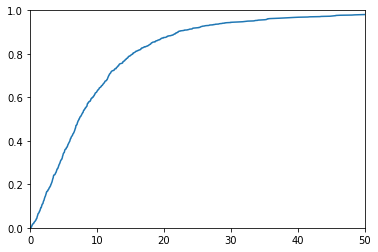

rms_error: 11.780729823322359
mean_error: 8.979374537767846
generating cdf:


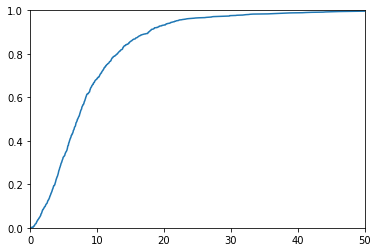

rms_error: 11.384014466816687
mean_error: 7.705531288647465
generating cdf:


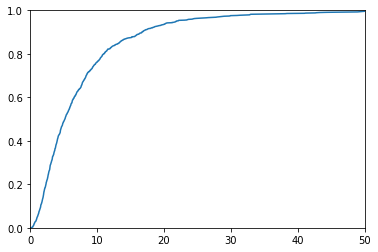

rms_error: 11.14177741279699
mean_error: 7.598185205230369
generating cdf:


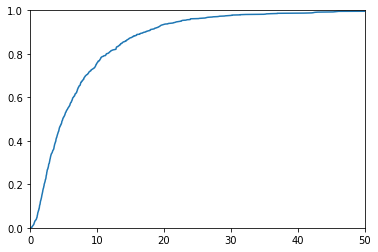

rms_error: 11.020746836996128
mean_error: 7.511020112636446
generating cdf:


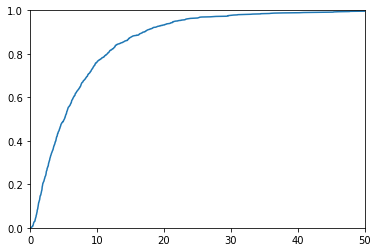

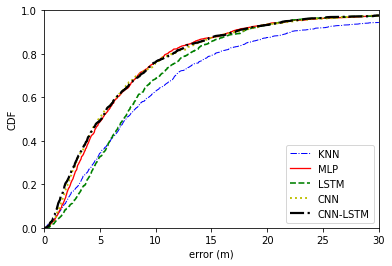

In [8]:
def error_analysis(pred_y,true_y):
    error =np.sqrt((pred_y[:,0]-true_y[:,0])**2+(pred_y[:,1]-true_y[:,1])**2)
    rms_error = rms(error)
    print('rms_error:', rms_error)
    mean_error = sum(error)/len(error)
    print('mean_error:', mean_error)
    print("generating cdf:")
    cdf_y,error_sorted = cdf(error)
    return cdf_y, error_sorted
#import tensorflow_addons as tfa
#from tensorflow_addons.layers import WeightNormalization
#from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
path_train = "trainingData.csv"
path_validation = "validationData.csv"
train_df = pd.read_csv(path_train,header = 0)
print(train_df.head(2))

train_AP_strengths =train_df.loc[:,'WAP001':'WAP520']
#train_AP_features= np.array(train_AP_strengths.replace([100], [-100]))
building_ids_str = train_df["BUILDINGID"].map(str) #convert all the building ids to strings
building_floors_str = train_df["FLOOR"].map(str) #convert all the building floors to strings
#print(id_label)
floor_enc = LabelEncoder()
floor_enc.fit(building_floors_str)
floor_id = floor_enc.transform(building_floors_str)
floor_id = floor_id.reshape(-1,1)
print("floor id",(floor_id.shape))
building_enc = LabelEncoder()
building_enc.fit(building_ids_str)
building_id = building_enc.transform(building_ids_str)
train_building_id = building_id.reshape(-1,1)
print("building id:",(building_id.shape))

train_AP_features = np.array(train_AP_strengths.replace([100],[-150]))
##### 1) RSSI_FLOOR 2) SSID 3) BUILDING_ID
train_id = np.argsort(train_AP_features)[:,504:520]
train_rssi = np.sort(train_AP_features)[:,504:520]
print(train_rssi[10])
print(train_id[10])
print(train_AP_features[train_id[10]])
#train_rssi_floor = np.hstack((train_rssi,floor_id))
#print(train_rssi_floor[0], train_rssi_floor.shape)
#print(train_id[0],train_rssi[0],train_AP_features[0])

input_data = [train_id, train_rssi, train_building_id]
train_df_LL = train_df.loc[:,'LONGITUDE':'LATITUDE']
train_labels = np.asarray(train_df_LL)
train_y,ranges,bias =  normalization(train_labels)
print(bias,ranges)
test_df = pd.read_csv(path_validation,header = 0)
print(test_df.head(2))
test_AP_strengths =test_df.loc[:,'WAP001':'WAP520']
#test_AP_features = np.array(test_AP_strengths.replace([100], [-100]))
test_building_ids_str = test_df["BUILDINGID"].map(str) #convert all the building ids to strings
test_building_floors_str = test_df["FLOOR"].map(str) #convert all the building floors to strings
#print(id_label)
test_floor_enc = LabelEncoder()
test_floor_enc.fit(building_floors_str)
test_floor_id = test_floor_enc.transform(test_building_floors_str)
test_floor_id = test_floor_id.reshape(-1,1)
print("test floor id",(test_floor_id.shape))
test_building_enc = LabelEncoder()
test_building_enc.fit(test_building_ids_str)
test_building_id = test_building_enc.transform(test_building_ids_str)
test_building_id = test_building_id.reshape(-1,1)
print("test building id:",(test_building_id.shape))
test_AP_features = np.array(test_AP_strengths.replace([100],[-150]))
test_id = np.argsort(test_AP_features)[:,504:520]
test_rssi = np.sort(test_AP_features)[:,504:520]

test_rssi_floor = np.hstack((test_rssi,test_floor_id))
print(test_rssi_floor[0], test_rssi_floor.shape)

test_df_LL = test_df.loc[:,'LONGITUDE':'LATITUDE']
test_y = np.asarray(test_df_LL)
import pickle 

knn_file = open('KNN.txt','rb')
knn_result = pickle.load(knn_file)
knn = error_analysis(test_y,knn_result)

lstm_file = open('LSTM.txt','rb')
lstm_result = pickle.load(lstm_file)
lstm = error_analysis(test_y,lstm_result)

mlp_file = open('MLP.txt','rb')
mlp_result = pickle.load(mlp_file)
mlp = error_analysis(test_y,mlp_result)

cnn_file = open('CNN.txt','rb')
cnn_result = pickle.load(cnn_file)
cnn = error_analysis(test_y,cnn_result)

cnn_lstm_file = open('CNN_LSTM.txt','rb')
cnn_lstm_result = pickle.load(cnn_lstm_file)
cnn_lstm = error_analysis(test_y,cnn_lstm_result)


from matplotlib import pyplot as plt
legend = ['KNN','MLP','LSTM','CNN','CNN-LSTM']
line_style =  ['-.','-', '--', ':','-.']
line_width = [1, 1.3, 1.6, 1.9,2.2]
color = ['b','r','g','y','black']

error_cdf = [knn,mlp, lstm,cnn,cnn_lstm]
plt.xlabel('error (m)')
plt.ylabel('CDF')
plt.xlim(0,30)
plt.ylim(0,1)
for i in range(5):
    plt.plot(error_cdf[i][1], error_cdf[i][0], color=color[i], linestyle=line_style[i],linewidth= str(line_width[i]))
plt.legend(legend)   
plt.savefig('cdf')
plt.show()

In [2]:
def cnn(input_data):
    print("using CNN")
    wapid_dim = input_data[0].shape[1]
    wapid_input_layer = L.Input(shape=(wapid_dim,))
    wap_emb = L.Embedding(520,40)(wapid_input_layer)
    wap_emb = L.BatchNormalization()(wap_emb)
    wap_emb = L.Flatten()(wap_emb)
    
    rssi_f_dim = input_data[1].shape[1]
    rssi_f_input_layer = L.Input(shape=(rssi_f_dim,))
    rssi_f = L.BatchNormalization()(rssi_f_input_layer)
    rssi_f_feature = L.Dense(16*40, activation='relu')(rssi_f)
    
    
    input_site_layer = L.Input(shape=(1,))
    print("input_site_layer", input_site_layer.shape)
    site_emb = L.Embedding(13, 1)(input_site_layer)
    print("site_emb1", site_emb.shape)
    site_emb = L.Flatten()(site_emb)
    print("site_emb2", site_emb.shape)
    site_emb = L.BatchNormalization()(site_emb)
    print("site_emb3", site_emb.shape)
    x = L.Concatenate(axis=1)([wap_emb, rssi_f_feature])
    x = L.BatchNormalization()(x)
    x = L.Dropout(0.2)(x)
    x = L.Dense(256, activation='relu')(x)
    x = L.Dropout(0.1)(x)
    x = L.Dense(128, activation='relu')(x)
    print("before",x.shape)
    x = L.Reshape((128, 1))(x)
    print("before2",x.shape)
    x = L.BatchNormalization()(x)   # input 128
    x = L.Conv1D(32, 3, strides=1, dilation_rate=1, activation='relu')(x)   # input 128, output 126
    print("CNN1",x.shape)
    y = x
    x = L.BatchNormalization()(x)
    x = L.Conv1D(64, 5, strides=2, dilation_rate=1, activation='relu')(x)   # input 126, output (126-5+0)/2+1 = 61
    x = L.BatchNormalization()(x)
    x = L.Conv1D(128, 7, strides=2, dilation_rate=1, activation='relu')(x)  # input 61, output (61-7+0)/2+1 = 28
    x = L.BatchNormalization()(x)
    x = L.Conv1D(64, 9, strides=1, dilation_rate=1, activation='relu')(x)  # input 23, output (28-9+0)/1+1 = 20
    x = L.BatchNormalization()(x)
    x = L.Conv1D(32, 5, strides=1, dilation_rate=1, activation='relu')(x)   # input 20, output (20-5+0)/1+1 = 16
    print("CNN_5 ", x.shape)
    x = L.Concatenate(axis=1)([x, y])
    x = L.BatchNormalization()(x)
    print("CNN_res ", x.shape)
    x = L.Conv1D(1, 1, strides=1, dilation_rate=1, activation='relu')(x)    # gloabl average pooling
    x = L.BatchNormalization()(x)  
    print("after cnn", x.shape)
    x = L.Flatten()(x)
    print("after flatten", x.shape)
    x = L.Dense(64, activation='relu')(x)
    x = L.Concatenate(axis=1)([x,site_emb])
    x = L.Dense(32, activation='relu')(x)
    output_layer_1 = L.Dense(2, name='xy')(x)
    model = M.Model([wapid_input_layer, rssi_f_input_layer, input_site_layer], [output_layer_1])
    model.compile(optimizer=tf.optimizers.Adam(lr=0.001), loss='mse', metrics=['mse'])
    return model

def cnn_lstm(input_data):
    wapid_dim = input_data[0].shape[1]
    wapid_input_layer = L.Input(shape=(wapid_dim,))
    wap_emb = L.Embedding(520,40)(wapid_input_layer)
    wap_emb = L.BatchNormalization()(wap_emb)
    wap_emb = L.Flatten()(wap_emb)
    
    rssi_f_dim = input_data[1].shape[1]
    rssi_f_input_layer = L.Input(shape=(rssi_f_dim,))
    rssi_f = L.BatchNormalization()(rssi_f_input_layer)
    rssi_f_feature = L.Dense(16*40, activation='relu')(rssi_f)
    
    
    input_site_layer = L.Input(shape=(1,))
    site_emb = L.Embedding(13, 1)(input_site_layer)
    site_emb = L.Flatten()(site_emb)
    site_emb = L.BatchNormalization()(site_emb)
    x = L.Concatenate(axis=1)([wap_emb, rssi_f_feature])
    x = L.BatchNormalization()(x)
    x = L.Dropout(0.2)(x)
    x = L.Dense(256, activation='relu')(x)
    x = L.Dropout(0.1)(x)
    x = L.Dense(128, activation='relu')(x)
    #x = L.Dropout(0.2)(x)
    x = L.Reshape((128, 1))(x)
    # x = L.Reshape((-1, 1))(x)
    x = L.BatchNormalization()(x)
    
    x = L.Conv1D(32, 3, strides=1, dilation_rate=1, activation='relu')(x)   # input 128, output 126
    y = x
    print("CNN1",x.shape)
    x = L.BatchNormalization()(x)
    x = L.Conv1D(64, 5, strides=2, dilation_rate=1, activation='relu')(x)   # input 126, output (126-5+0)/2+1 = 61
    x = L.BatchNormalization()(x)
    x = L.Conv1D(128, 7, strides=2, dilation_rate=1, activation='relu')(x)  # input 61, output (61-7+0)/2+1 = 28
    x = L.BatchNormalization()(x)
    x = L.Conv1D(64, 9, strides=1, dilation_rate=1, activation='relu')(x)  # input 23, output (28-9+0)/1+1 = 20
    x = L.BatchNormalization()(x)
    x = L.Conv1D(32, 5, strides=1, dilation_rate=1, activation='relu')(x)   # input 20, output (20-5+0)/1+1 = 16
    x = L.BatchNormalization()(x)
    # x = L.Concatenate(axis=1)([x, y])
    # x = L.Dense(64, activation='relu')(x)
    x = L.Conv1D(1, 1, strides=1, dilation_rate=1, activation='relu')(x)    # gloabl average pooling
    print("after conv1D", x.shape)
    x = L.BatchNormalization()(x) 
    x = L.LSTM(128, dropout=0, return_sequences=True, activation='sigmoid')(x)
    x = L.LSTM(16, dropout=0, return_sequences=False, activation='sigmoid')(x)
    print("after LSTM ", x.shape)
    x = L.Concatenate(axis=1)([x,site_emb]) 
    x = L.Dense(64, activation='relu')(x)
    x = L.Dense(16, activation='relu')(x)
    #x = L.Dropout(0.1)(x)
    output_layer_1 = L.Dense(2, name='xy', activation='sigmoid')(x)
    model = M.Model([wapid_input_layer, rssi_f_input_layer, input_site_layer], [output_layer_1])
    model.compile(optimizer=tf.optimizers.Adam(lr=0.001), loss='mse', metrics=['mse'])
    return model
def mlp(input_data):
    wapid_dim = input_data[0].shape[1]
    wapid_input_layer = L.Input(shape=(wapid_dim,))
    wap_emb = L.Embedding(520,40)(wapid_input_layer)
    wap_emb = L.BatchNormalization()(wap_emb)
    wap_emb = L.Flatten()(wap_emb)
    
    rssi_f_dim = input_data[1].shape[1]
    rssi_f_input_layer = L.Input(shape=(rssi_f_dim,))
    rssi_f = L.BatchNormalization()(rssi_f_input_layer)
    rssi_f_feature = L.Dense(16*40, activation='relu')(rssi_f)
    
    
    input_site_layer = L.Input(shape=(1,))
    site_emb = L.Embedding(13, 1)(input_site_layer)
    site_emb = L.Flatten()(site_emb)
    site_emb = L.BatchNormalization()(site_emb)
    x = L.Concatenate(axis=1)([wap_emb, rssi_f_feature])
    x = L.BatchNormalization()(x)
    x = L.Dropout(0.1)(x)
    x = L.Dense(256, activation='relu')(x)
    x = L.Dropout(0.2)(x)
    #x = L.Reshape((-1, 1))(x)
    x = L.BatchNormalization()(x)
    x = L.Dense(128,activation='relu')(x)
    x = L.Dropout(0.1)(x)
    x = L.Dense(64, activation='relu')(x)
    x = L.Concatenate(axis=1)([x,site_emb])
    x = L.Dense(16, activation='relu')(x)
    #x = L.Dropout(0.1)(x)
    output_layer_1 = L.Dense(2, name='xy')(x)
    model = M.Model([wapid_input_layer, rssi_f_input_layer, input_site_layer], [output_layer_1])
    model.compile(optimizer=tf.optimizers.Adam(lr=0.001), loss='mse', metrics=['mse'])
    model.summary()
    return model
def lstm(input_data):
    wapid_dim = input_data[0].shape[1]
    wapid_input_layer = L.Input(shape=(wapid_dim,))
    wap_emb = L.Embedding(520,40)(wapid_input_layer)
    wap_emb = L.BatchNormalization()(wap_emb)
    wap_emb = L.Flatten()(wap_emb)
    
    rssi_f_dim = input_data[1].shape[1]
    rssi_f_input_layer = L.Input(shape=(rssi_f_dim,))
    rssi_f = L.BatchNormalization()(rssi_f_input_layer)
    rssi_f_feature = L.Dense(16*40, activation='relu')(rssi_f)
    
    
    input_site_layer = L.Input(shape=(1,))
    site_emb = L.Embedding(13, 1)(input_site_layer)
    site_emb = L.Flatten()(site_emb)
    site_emb = L.BatchNormalization()(site_emb)
    x = L.Concatenate(axis=1)([wap_emb, rssi_f_feature])
    x = L.BatchNormalization()(x)
    #x = L.Dropout(0.2)(x)
    #x = L.Dense(256, activation='relu')(x)
    x = L.Dropout(0.1)(x)
    x = L.Dense(128, activation='relu')(x)
    #x = L.Dropout(0.2)(x)
    x = L.Reshape((-1, 1))(x)
    print(x.shape)
    x = L.BatchNormalization()(x)
    x = L.LSTM(128, dropout=0.1, recurrent_dropout=0, return_sequences=True, activation='sigmoid')(x)
    x = L.LSTM(64, dropout=0.1, return_sequences=False, activation='sigmoid')(x)
    #x = L.Dense(128,activation='relu')(x)
    #x = L.Dropout(0.2)(x)
    #x = L.Reshape((-1, 1))(x)
    x = L.Dense(64, activation='relu')(x)
    #x = L.LSTM(16, dropout=0, return_sequences=False, activation='relu')(x)
    x = L.Concatenate(axis=1)([x,site_emb])
    x = L.Dense(16, activation='relu')(x)
    #x = L.Dropout(0.1)(x)
    output_layer_1 = L.Dense(2, name='xy')(x)
    model = M.Model([wapid_input_layer, rssi_f_input_layer, input_site_layer], [output_layer_1])
    model.compile(optimizer=tf.optimizers.Adam(lr=0.001), loss='mse', metrics=['mse'])
    return model

In [ ]:
def load_mlp_files():
    files = ['mlp_dropout_layer_result_0.3.txt','mlp_dropout_layer_result_0.5.txt','mlp_dropout_layer_result_0.7.txt',
             'mlp_dropout_layer_result_0.9.txt','mlp_dropout_layer_result_1.0.txt']
    import pickle
    for fileName in files:
        file = open(fileName, 'rb')
        test_pred_y = pickle.load(file)
        error_analysis(test_y, test_pred_y)
load_mlp_files()

In [ ]:
def train_val_split(xs, y,ratio):
    new_xs = []
    new_y = []
    train_val_split = np.random.rand(len(y))
    train_val_split = train_val_split < ratio #should contain ~70% percent true
    for x in xs:
        x = x[train_val_split]
        new_xs.append(x)
    y = y[train_val_split]
    new_y.append(y)
    return new_xs, new_y



In [ ]:

def train_val_split(xs, y,ratio):
    new_xs = []
    new_y = []
    train_val_split = np.random.rand(len(y))
    train_val_split = train_val_split < ratio #should contain ~70% percent true
    for x in xs:
        x = x[train_val_split]
        new_xs.append(x)
    y = y[train_val_split]
    new_y.append(y)
    return new_xs, new_y

import pickle
for i in [1]:
    ratio = i * 0.1
    part_train_x, part_train_y = train_val_split(input_data, train_y, ratio) 
    print("ratio: "+ str(i)) 
    model = lstm(part_train_x)
    #model.compile(optimizer=tf.optimizers.Adam(lr=0.001), loss='mse', metrics=['mse'])
    model.fit(part_train_x,part_train_y,nb_epoch=100,batch_size=128,verbose = 1)
    test_pred_y = model.predict([test_id, test_rssi, test_building_id])
    test_pred_y = test_pred_y * ranges + bias 
    error_analysis(test_y, test_pred_y)
    fileName = 'lstm_2_layer_result_' + str(ratio)+ '.txt'
    print("writing to file name: ", fileName)
    file = open(fileName,'wb')
    pickle.dump(test_pred_y,file)
    file.close()

In [ ]:
def altered_rssi_analysis():
    from sklearn import neighbors
    path_train = "trainingData.csv"
    path_validation = "validationData.csv"
    train_df = pd.read_csv(path_train,header = 0)
    train_AP_strengths =train_df.loc[:,'WAP001':'WAP520']
    building_ids_str = train_df["BUILDINGID"].map(str) #convert all the building ids to strings
    building_floors_str = train_df["FLOOR"].map(str) #convert all the building floors to strings
    floor_enc = LabelEncoder()
    floor_enc.fit(building_floors_str)
    floor_id = floor_enc.transform(building_floors_str)
    floor_id = floor_id.reshape(-1,1)
    building_enc = LabelEncoder()
    building_enc.fit(building_ids_str)
    building_id = building_enc.transform(building_ids_str)
    train_building_id = building_id.reshape(-1,1)
    train_AP_features = np.array(train_AP_strengths.replace([100],[-150]))
    train_id = np.argsort(train_AP_features)[:,504:520]
    train_rssi = np.sort(train_AP_features)[:,504:520]
    print(train_rssi[10])
    print(train_id[10])
    print(train_AP_features[train_id[10]])
    train_df_LL = train_df.loc[:,'LONGITUDE':'LATITUDE']
    train_labels = np.asarray(train_df_LL)
    train_y,ranges,bias =  normalization(train_labels)
    print(bias,ranges)
    test_df = pd.read_csv(path_validation,header = 0)
    print(test_df.head(2))
    test_AP_strengths =test_df.loc[:,'WAP001':'WAP520']
    #test_AP_features = np.array(test_AP_strengths.replace([100], [-100]))
    test_building_ids_str = test_df["BUILDINGID"].map(str) #convert all the building ids to strings
    test_building_floors_str = test_df["FLOOR"].map(str) #convert all the building floors to strings
    #print(id_label)
    test_floor_enc = LabelEncoder()
    test_floor_enc.fit(building_floors_str)
    test_floor_id = test_floor_enc.transform(test_building_floors_str)
    test_floor_id = test_floor_id.reshape(-1,1)
    print("test floor id",(test_floor_id.shape))
    test_building_enc = LabelEncoder()
    test_building_enc.fit(test_building_ids_str)
    test_building_id = test_building_enc.transform(test_building_ids_str)
    test_building_id = test_building_id.reshape(-1,1)
    print("test building id:",(test_building_id.shape))
    test_AP_features = np.array(test_AP_strengths.replace([100],[-150]))
    test_id = np.argsort(test_AP_features)[:,504:520]
    test_rssi = np.sort(test_AP_features)[:,504:520]
    test_rssi_floor = np.hstack((test_rssi,test_floor_id))
    print(test_rssi_floor[0], test_rssi_floor.shape)
    test_df_LL = test_df.loc[:,'LONGITUDE':'LATITUDE']
    test_y = np.asarray(test_df_LL)
    for i in range(2,5):

        train_rssi =  train_rssi + np.random.normal(0, 2*i, None)
        input_data = [train_id, train_rssi, train_building_id]

        model = cnn_lstm(input_data)
        #model.compile(optimizer=tf.optimizers.Adam(lr=0.001), loss='mse', metrics=['mse'])
        model.fit(input_data,train_y,nb_epoch=100,batch_size=128,verbose = 1)
        test_pred_y = model.predict([test_id, test_rssi, test_building_id])
        test_pred_y = test_pred_y * ranges + bias 
        error_analysis(test_y, test_pred_y)
        fileName = 'cnn_lstm_layer_altered_' + str(2*i)+ '_db.txt'
        print("writing to file name: ", fileName)
        file = open(fileName,'wb')
        pickle.dump(test_pred_y,file)
        file.close()

        
        model = lstm(input_data)
        #model.compile(optimizer=tf.optimizers.Adam(lr=0.001), loss='mse', metrics=['mse'])
        model.fit(input_data,train_y,nb_epoch=100,batch_size=128,verbose = 1)
        test_pred_y = model.predict([test_id, test_rssi, test_building_id])
        test_pred_y = test_pred_y * ranges + bias 
        error_analysis(test_y, test_pred_y)
        fileName = 'lstm_layer_altered_' + str(2*i)+ '_db.txt'
        print("writing to file name: ", fileName)
        file = open(fileName,'wb')
        pickle.dump(test_pred_y,file)
        file.close()
        continue
        
        #cnn_LSTM
        model = cnn_lstm(input_data)
        #model.compile(optimizer=tf.optimizers.Adam(lr=0.001), loss='mse', metrics=['mse'])
        model.fit(input_data,train_y,nb_epoch=100,batch_size=128,verbose = 1)
        test_pred_y = model.predict([test_id, test_rssi, test_building_id])
        test_pred_y = test_pred_y * ranges + bias 
        error_analysis(test_y, test_pred_y)
        fileName = 'cnn_lstm_layer_altered_' + str(2*i)+ '_db.txt'
        print("writing to file name: ", fileName)
        file = open(fileName,'wb')
        pickle.dump(test_pred_y,file)
        file.close()

        continue
        # CNN
        model = cnn(input_data)
        #model.compile(optimizer=tf.optimizers.Adam(lr=0.001), loss='mse', metrics=['mse'])
        model.fit(input_data,train_y,nb_epoch=100,batch_size=128,verbose = 1)
        test_pred_y = model.predict([test_id, test_rssi, test_building_id])
        test_pred_y = test_pred_y * ranges + bias 
        error_analysis(test_y, test_pred_y)
        fileName = 'cnn_layer_altered_' + str(i*2)+ '_db.txt'
        print("writing to file name: ", fileName)
        file = open(fileName,'wb')
        pickle.dump(test_pred_y,file)
        file.close()
        ratio = i * 2

        # MLP

        model = mlp(input_data)
        model.fit(input_data,train_y,nb_epoch=100,batch_size=128,verbose = 1)
        test_pred_y = model.predict([test_id, test_rssi, test_building_id])
        test_pred_y = test_pred_y * ranges + bias 
        error_analysis(test_y, test_pred_y)
        fileName = 'mlp_layer_altered_' + str(ratio)+ '_db.txt'
        print("writing to file name: ", fileName)
        file = open(fileName,'wb')
        pickle.dump(test_pred_y,file)
        file.close()
        #LSTM


altered_rssi_analysis()

[-97 -94 -94 -94 -90 -90 -88 -88 -87 -86 -86 -84 -83 -83 -83 -80]
[154  35 141 155  90  89 102 190 103 150 191 172 171   7 149 247]
[[-150 -150 -150 ... -150 -150 -150]
 [-150 -150 -150 ... -150 -150 -150]
 [-150 -150 -150 ... -150 -150 -150]
 ...
 [-150 -150 -150 ... -150 -150 -150]
 [-150 -150 -150 ... -150 -150 -150]
 [-150 -150 -150 ... -150 -150 -150]]
[  -7691.3384     4864745.74501597] [390.51940991 270.94278403]
   WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0     100     100     100     100     100     100     100     100     100   
1     100     100     100     100     100     100     100     100     100   

   WAP010  ...  WAP520    LONGITUDE      LATITUDE  FLOOR  BUILDINGID  SPACEID  \
0     100  ...     100 -7515.916799  4.864890e+06      1           1        0   
1     100  ...     100 -7383.867221  4.864840e+06      4           2        0   

   RELATIVEPOSITION  USERID  PHONEID   TIMESTAMP  
0                 0       0        0  1380872703 

In [ ]:
test_df = pd.read_csv(path_validation,header = 0)
print(test_df.head(2))
test_AP_strengths =test_df.loc[:,'WAP001':'WAP520']
#test_AP_features = np.array(test_AP_strengths.replace([100], [-100]))
test_building_ids_str = test_df["BUILDINGID"].map(str) #convert all the building ids to strings
test_building_floors_str = test_df["FLOOR"].map(str) #convert all the building floors to strings
#print(id_label)
test_floor_enc = LabelEncoder()
test_floor_enc.fit(building_floors_str)
test_floor_id = test_floor_enc.transform(test_building_floors_str)
test_floor_id = test_floor_id.reshape(-1,1)
print("test floor id",(test_floor_id.shape))
test_building_enc = LabelEncoder()
test_building_enc.fit(test_building_ids_str)
test_building_id = test_building_enc.transform(test_building_ids_str)
test_building_id = test_building_id.reshape(-1,1)
print("test building id:",(test_building_id.shape))
test_AP_features = np.array(test_AP_strengths.replace([100],[-100]))
test_id = np.argsort(test_AP_features)[:,500:520]
test_rssi = np.sort(test_AP_features)[:,500:520]

test_rssi_floor = np.hstack((test_rssi,test_floor_id))
print(test_rssi_floor[0], test_rssi_floor.shape)

test_df_LL = test_df.loc[:,'LONGITUDE':'LATITUDE']
test_y = np.asarray(test_df_LL)
test_pred_y = model.predict([test_id, test_rssi, test_building_id])
test_pred_y = test_pred_y * ranges + bias 
error_analysis(test_y, test_pred_y)